# Three Year Comparison

#### Unique Devices <a class="anchor" id="devices"></a>
[Back to Table of Contents](#toc)

In [10]:
co_uds_r = hive.run("""
select
    country,
    year,
    sum(uniques_estimate) 
from wmf.unique_devices_per_domain_monthly
where
    year >= 2016
    AND country_code IN ({glow_iso_codes})
group by country, year
""".format(**query_vars)) 

In [102]:
pd.options.display.float_format = '{:,.2f}'.format

In [103]:
co_uds = co_uds_r.pivot(index='country', columns='year', values='_c2')

In [104]:
co_uds.columns = ['2016','2017','2018', '2019_to_nov']

In [105]:
co_uds['CAGR'] = ((co_uds['2018']/co_uds['2016']) **(1/3)-1)

#https://stackoverflow.com/questions/23981601/format-certain-floating-dataframe-columns-into-percentage-in-pandas
co_uds['CAGR'] = pd.Series(["{0:.2f}%".format(val * 100) for val in co_uds['CAGR']], index = co_uds.index)

co_uds['2018_monthly_avg'] = (co_uds['2018']/12)

In [106]:
#co_uds_cols = co_uds.columns.tolist()
co_uds_cols = ['2016', '2017', '2018', 'CAGR', '2018_monthly_avg','2019_to_nov']
co_uds = co_uds[co_uds_cols]

In [ ]:
co_uds

In [108]:
co_uds.to_csv("./data/glow/co_uds.csv", sep=',', encoding = 'utf-8')

In [87]:
def yellow_focus(row):
    color = 'white'
    if row.values['-1'] == 'India':
        color = 'yellow'
    return ['background-color: %s' % color]*len(row.values)


In [85]:
co_uds.style.apply(yellow_focus, axis=1)

IndexError: ('only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices', 'occurred at index 2016')

In [89]:
yellow_highlight = (co_uds.index == 'India').map({True:'background-color:yellow', False:''})
co_uds.style.apply(lambda s:yellow_highlight)

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [42]:
co_uds_pct_ch = co_uds[['2016', '2017', '2018']].copy()

In [ ]:
co_uds_pct_ch.pct_change(axis = 1)

In [116]:
#CAGR wireless subscribers in India
#((472720000/322210000) **(1/3)-1)

0.14

In [123]:
co_uds_domain_r = hive.run("""
select
    domain, 
    country,
    year,
    sum(uniques_estimate) 
from wmf.unique_devices_per_domain_monthly
where
    year >= 2016
    AND country_code IN ({glow_iso_codes})
    AND domain IN ({glow_domains})
group by country, domain, year
""".format(**query_vars)) 

In [128]:
co_uds_domain = co_uds_domain_r.copy()

In [ ]:
#https://stackoverflow.com/questions/35414625/pandas-how-to-run-a-pivot-with-a-multi-index
co_uds_domain.set_index(['country', 'domain', 'year']).unstack(level=-1)

In [135]:
india_uds_domain_r = hive.run("""
select
    domain, 
    country,
    year,
    sum(uniques_estimate) 
from wmf.unique_devices_per_domain_monthly
where
    year >= 2016
    AND country_code IN ({india_country_codes})
    AND domain IN ({india_domains})
group by country, domain, year
""".format(**query_vars)) 

In [ ]:
india_uds_domain_r

In [161]:
india_uds_domain = india_uds_domain_r.pivot(
                                    index='domain',
                                    columns='year', 
                                    values='_c3')

In [162]:
india_uds_domain.columns = ['2016','2017','2018', '2019_to_nov']

india_uds_domain['CAGR'] = ((india_uds_domain['2018']/india_uds_domain['2016']) **(1/3)-1)

#https://stackoverflow.com/questions/23981601/format-certain-floating-dataframe-columns-into-percentage-in-pandas
india_uds_domain['CAGR'] = pd.Series(["{0:.2f}%".format(val * 100) for val in india_uds_domain['CAGR']], index = india_uds_domain.index)

india_uds_domain['2018_monthly_avg'] = (india_uds_domain['2018']/12)

In [ ]:
india_uds_domain.sort_values(['2018', 'CAGR'], 
               ascending=[False, False])

In [181]:
india_uds_domain.to_csv("./data/glow/india_uds_domain.csv", sep=',', encoding = 'utf-8')

In [21]:
co_uds_r = hive.run("""
SELECt
    country_code,
    country,
    sum(uniques_estimate) 
FROM wmf.unique_devices_per_domain_monthly
WHERE
  CONCAT(year,LPAD(month,2,'0')) >= 201809
  AND CONCAT(year,LPAD(month,2,'0')) < 201910
  AND country_code IN ({glow_iso_codes})
group by country_code, country
""".format(**query_vars))        
        

In [ ]:
co_uds_18_19_r

In [23]:
co_uds_17_18_r = hive.run("""
select
    country_code,
    country,
    sum(uniques_estimate) / 12 as monthly_unique_devices
from wmf.unique_devices_per_domain_monthly
WHERE
  CONCAT(year,LPAD(month,2,'0')) >= 201709
  AND CONCAT(year,LPAD(month,2,'0')) < 201909
  AND country_code IN ({glow_iso_codes})
group by country_code, country
""".format(**query_vars))

In [ ]:
co_uds_17_18_r

In [24]:
devices = co_uds_17_18_r.merge(co_uds_18_19_r[['country', 'monthly_unique_devices']], on='country', how="left").fillna(0)

In [ ]:
devices
#y= 18_19
#x = 17_18

In [26]:
devices.rename(columns={'monthly_unique_devices_y':'monthly_unique_devices_19','monthly_unique_devices_x':'monthly_unique_devices_18'},inplace=True)

In [28]:
devices.to_csv("./data/glow/devices.csv", sep=',', encoding = 'utf-8')

## Articles<a class="anchor" id="editors"></a>
[Back to Table of Contents](#toc)

## Historical Article Counts

In [28]:
file = 'data_collection/articles/wiki_counts_India_GLOW.csv'

wiki_counts = pd.read_csv(file, sep=',', thousands=',')

del wiki_counts['Unnamed: 0']
wiki_counts= wiki_counts.dropna()
wiki_counts['date'] = pd.to_datetime(wiki_counts['date'])

/home/iflorez/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
wiki_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 767
Data columns (total 3 columns):
date     624 non-null datetime64[ns]
lang     624 non-null object
count    624 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 19.5+ KB


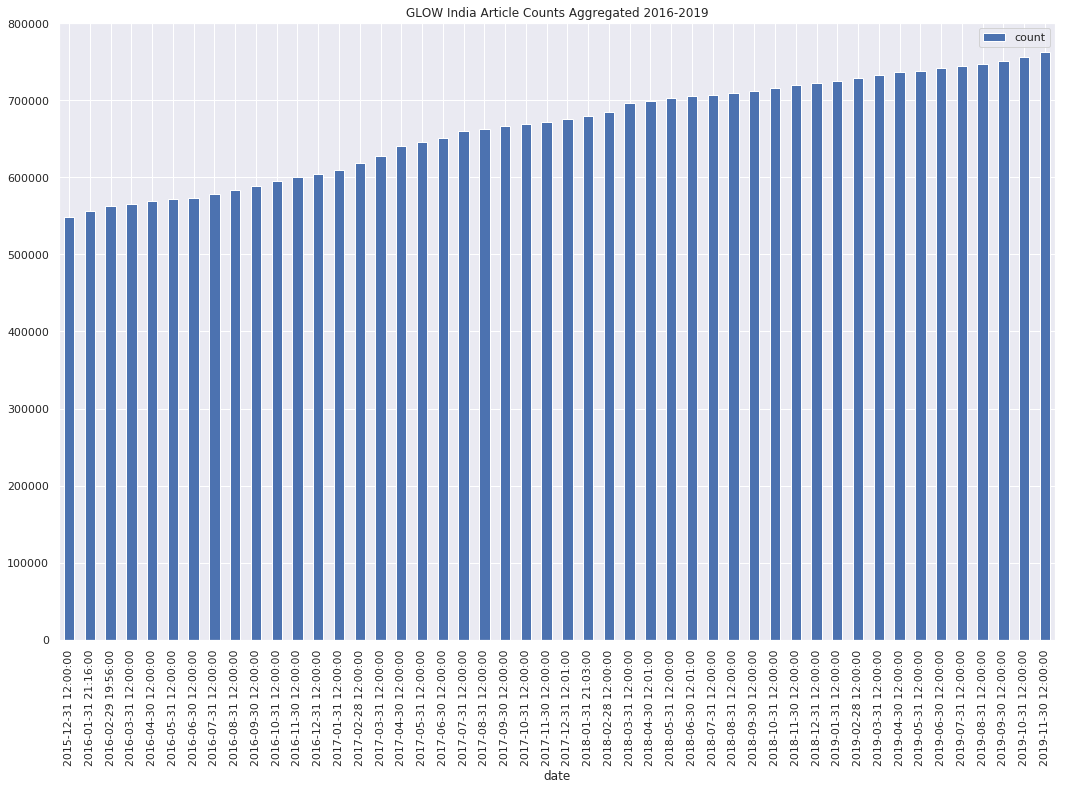

<Figure size 432x288 with 0 Axes>

In [51]:
wiki_counts_India_agg = wiki_counts.groupby('date').sum().plot(kind='bar', figsize=(15,11), grid=True)
plt.tight_layout()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('GLOW India Article Counts Aggregated 2016-2019')
plt.show()
plt.savefig('wiki_counts_India_GLOW_agg_chart');

In [ ]:
sns.set() 
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)

ax.set_title('wiki counts India GLOW')
sns.lineplot(x="date", y="count", 
            data=wiki_counts_India_agg)

plt.xticks(rotation=45)
plt.title('GLOW India Article Counts Aggregated 2016-2019')

plt.tight_layout()
plt.show()
plt.savefig('wiki_counts_India_GLOW_agg_chart');

/home/iflorez/venv/lib/python3.5/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


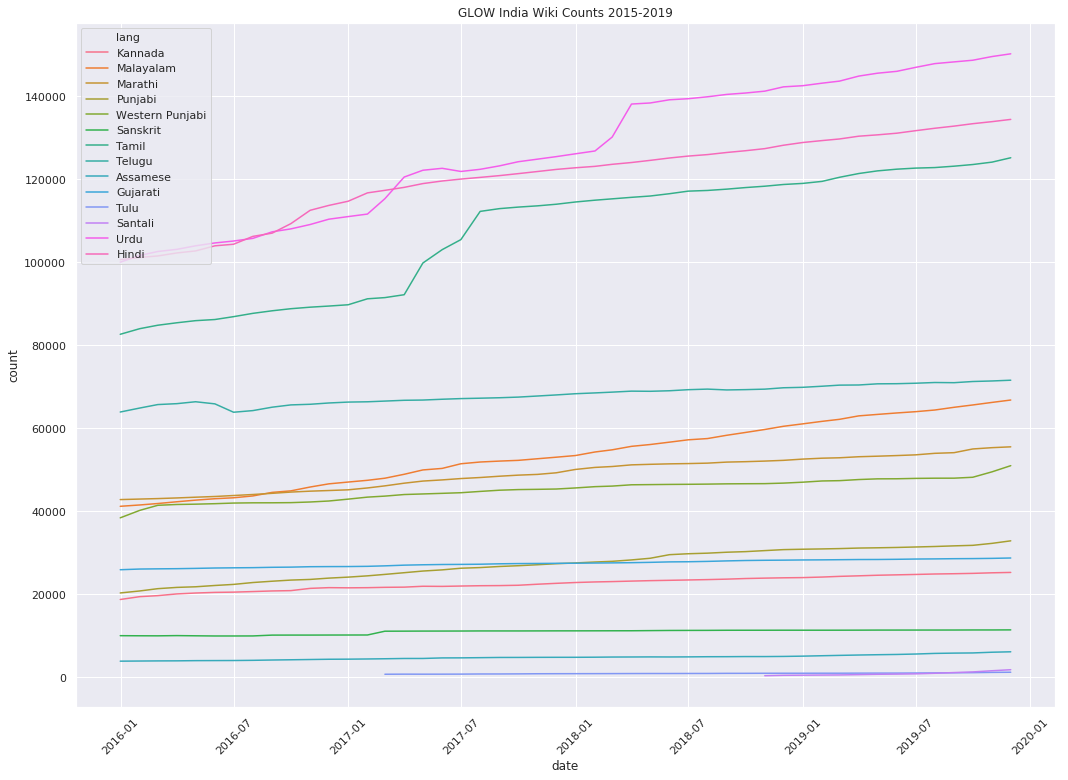

<Figure size 432x288 with 0 Axes>

In [32]:
sns.set() 
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)

ax.set_title('wiki counts India GLOW')
sns.lineplot(x="date", y="count", hue="lang", 
            data=wiki_counts)

plt.xticks(rotation=45)
plt.title('GLOW India Wiki Counts 2016-2019')

plt.tight_layout()
plt.show()
plt.savefig('wiki_counts_India_GLOW_chart');

### Current article Count <a class="anchor" id="new_articles"></a>
[Back to Table of Contents](#toc)

In [443]:
# TSV file where metrics are or will be saved
AC_FILENAME = "ac.tsv"

# so we can easily use them to format strings
metrics_month = pd.Period(PAGES_ADDED_START)

# Load any previous results
try:
    old_metrics = (
        pd.read_csv(AC_FILENAME, sep="\t", parse_dates = ["month"])
        .set_index("month")
    )
except FileNotFoundError:
    old_metrics = None
    
def prepare_query(filename):
    return (
        Path(filename)
        .read_text()
    )

In [455]:
PAGE_COUNT_API = (
    "http://aqs1004.eqiad.wmnet:7232/analytics.wikimedia.org/v1/" 
    "edited-pages/aggregate/{project}/all-editor-types/content/all-activity-levels/monthly/20000101/20191201"
)

headers = {
    "User-Agent": "Partnerships' GLOW project Data Analyst"
}

# Create container for results
api_pc_results = []

def get_page_count(
    project="all-projects",
    
):
    url = PAGE_COUNT_API.format(
        project = project
    )
    
    r = requests.get(url, headers=headers)
    data = r.json()["items"][0]["results"]
    frame = pd.DataFrame(data)
    frame["timestamp"] = pd.to_datetime(frame["timestamp"])
    frame = frame.rename(columns={"timestamp": "month"})
    
    return frame

In [456]:
# Get a list of project URLs (each one in a 1-tuple)
#https://hi.wikipedia.org

wp_domains = hive.run("""
select domain_name
from canonical_data.wikis
where database_group = "wikipedia"
      AND database_code IN ({glow_wiki_dbs})
""".format(**query_vars), fmt="raw")



# Query the API for each project and append records to a list
results = []
n = len(wp_domains)

for idx, val in enumerate(wp_domains):
    domain = val[0]
    
    if idx % 10 == 0:
        msg = "Now on the {}th project of {} ({})"
        print_err(msg.format(idx, n, domain))
        
    frame = get_page_count(project=domain).reset_index()
    frame["project"] = domain
    records = frame.to_dict("records")
    results.extend(records)
    
    # Sleep 20 milliseconds
    time.sleep(0.02)

# Turn the big list of records into a data frame
page_count_r = pd.DataFrame(results)

Now on the 0th project of 23 (ar.wikipedia.org)
Now on the 10th project of 23 (min.wikipedia.org)
Now on the 20th project of 23 (tcy.wikipedia.org)


In [457]:
page_count_r.tail()

,edited_pages,index,month,project
5216,3810,222,2019-07-01 00:00:00+00:00,ur.wikipedia.org
5217,3107,223,2019-08-01 00:00:00+00:00,ur.wikipedia.org
5218,1621,224,2019-09-01 00:00:00+00:00,ur.wikipedia.org
5219,2309,225,2019-10-01 00:00:00+00:00,ur.wikipedia.org
5220,2568,226,2019-11-01 00:00:00+00:00,ur.wikipedia.org


In [460]:
#october

#adapted from:
#https://github.com/wikimedia-research/wiki-segmentation

#https://www.mediawiki.org/wiki/Manual:Site_stats_table
ac = wmf.mariadb.run("""
SELECT
    database() AS wiki,
    ss_good_articles AS total_article_COUNT
FROM site_stats
""", india_glow_wiki_dbs_mariadb)

In [324]:
ac

,wiki,article_COUNT
0,bnwiki,74692
1,hiwiki,133410
2,mlwiki,65887
3,pawiki,31828
4,tawiki,123659
5,tewiki,71308
6,aswiki,5938
7,sawiki,11419
8,knwiki,25095
9,tcywiki,1147


## Articles added

In [342]:
# TSV file where metrics are or will be saved
FILENAME = "metrics.tsv"

# so we can easily use them to format strings
metrics_month = pd.Period(PAGES_ADDED_START)
date_params = {
    "api_metrics_month_first_day": metrics_month.asfreq("D", how="start").strftime("%Y%m%d"),
    "api_metrics_month_day_after": (metrics_month + 1092).asfreq("D", how="start").strftime("%Y%m%d"), #364 for one year, #728 for two
}

# Load any previous results
try:
    old_metrics = (
        pd.read_csv(FILENAME, sep="\t", parse_dates = ["month"])
        .set_index("month")
    )
except FileNotFoundError:
    old_metrics = None
    
def prepare_query(filename):
    return (
        Path(filename)
        .read_text()
        .format(**date_params)
    )

In [343]:
NEW_PAGES_API = (
    # Replaces "https://wikimedia.org/api/rest_v1/metrics/" due to https://phabricator.wikimedia.org/P8605
    "http://aqs1004.eqiad.wmnet:7232/analytics.wikimedia.org/v1/" 
    "edited-pages/new/{project}/all-editor-types/{page_type}/monthly/{start}/{end}"
)

headers = {
    "User-Agent": "Partnerships' GLOW project Data Analyst"
}

# Create container for results
api_results = []

def get_new_pages(
    project="all-projects",
    page_type="content",
    start=date_params["api_metrics_month_first_day"],
    end=date_params["api_metrics_month_day_after"]
    
):
    url = NEW_PAGES_API.format(
        project = project,
        page_type = page_type,
        start = start,
        end = end
    )
    
    r = requests.get(url, headers=headers)
    data = r.json()["items"][0]["results"]
    frame = pd.DataFrame(data)
    frame["timestamp"] = pd.to_datetime(frame["timestamp"])
    frame = frame.rename(columns={"timestamp": "month"})
    
    return frame

In [344]:
# Get a list of project URLs (each one in a 1-tuple)
#https://hi.wikipedia.org

wp_domains = hive.run("""
select domain_name
from canonical_data.wikis
where database_group = "wikipedia"
      AND database_code IN ({glow_wiki_dbs})
""".format(**query_vars), fmt="raw")



# Query the API for each project and append records to a list
results = []
n = len(wp_domains)

for idx, val in enumerate(wp_domains):
    domain = val[0]
    
    if idx % 10 == 0:
        msg = "Now on the {}th project of {} ({})"
        print_err(msg.format(idx, n, domain))
        
    frame = get_new_pages(project=domain).reset_index()
    frame["project"] = domain
    records = frame.to_dict("records")
    results.extend(records)
    
    # Sleep 20 milliseconds
    time.sleep(0.02)

# Turn the big list of records into a data frame
new_per_wp_r = pd.DataFrame(results)

Now on the 0th project of 23 (ar.wikipedia.org)
Now on the 10th project of 23 (min.wikipedia.org)
Now on the 20th project of 23 (tcy.wikipedia.org)


In [341]:
wp_domains

[('ar.wikipedia.org',),
 ('as.wikipedia.org',),
 ('bn.wikipedia.org',),
 ('en.wikipedia.org',),
 ('es.wikipedia.org',),
 ('gu.wikipedia.org',),
 ('hi.wikipedia.org',),
 ('id.wikipedia.org',),
 ('jv.wikipedia.org',),
 ('kn.wikipedia.org',),
 ('min.wikipedia.org',),
 ('ml.wikipedia.org',),
 ('mr.wikipedia.org',),
 ('or.wikipedia.org',),
 ('pa.wikipedia.org',),
 ('pnb.wikipedia.org',),
 ('sat.wikipedia.org',),
 ('sa.wikipedia.org',),
 ('su.wikipedia.org',),
 ('ta.wikipedia.org',),
 ('tcy.wikipedia.org',),
 ('te.wikipedia.org',),
 ('ur.wikipedia.org',)]

In [ ]:
new_per_wp_r

In [346]:
new_per_wp = new_per_wp_r.copy()

#make sure month column is in datetime format
new_per_wp['month'] = pd.to_datetime(new_per_wp['month'])

#create new column, 'year'
new_per_wp['year'] = new_per_wp['month'].dt.year
#new_per_wp['month'] = new_per_wp['month'].dt.month
#year2019 = new_per_wp[new_per_wp['year']==2019]

In [347]:
#create new countries column
new_per_wp['countries'] = new_per_wp['project'].apply(add_country_column).str[0]
#rename the MENA entry in the countries column
new_per_wp['countries'] = new_per_wp['countries'].replace({'M':'MENA'})

#del new_per_wp['index']

#format datetime column
new_per_wp['month'] = new_per_wp['month'].map(lambda x: x.strftime('%Y-%m'))

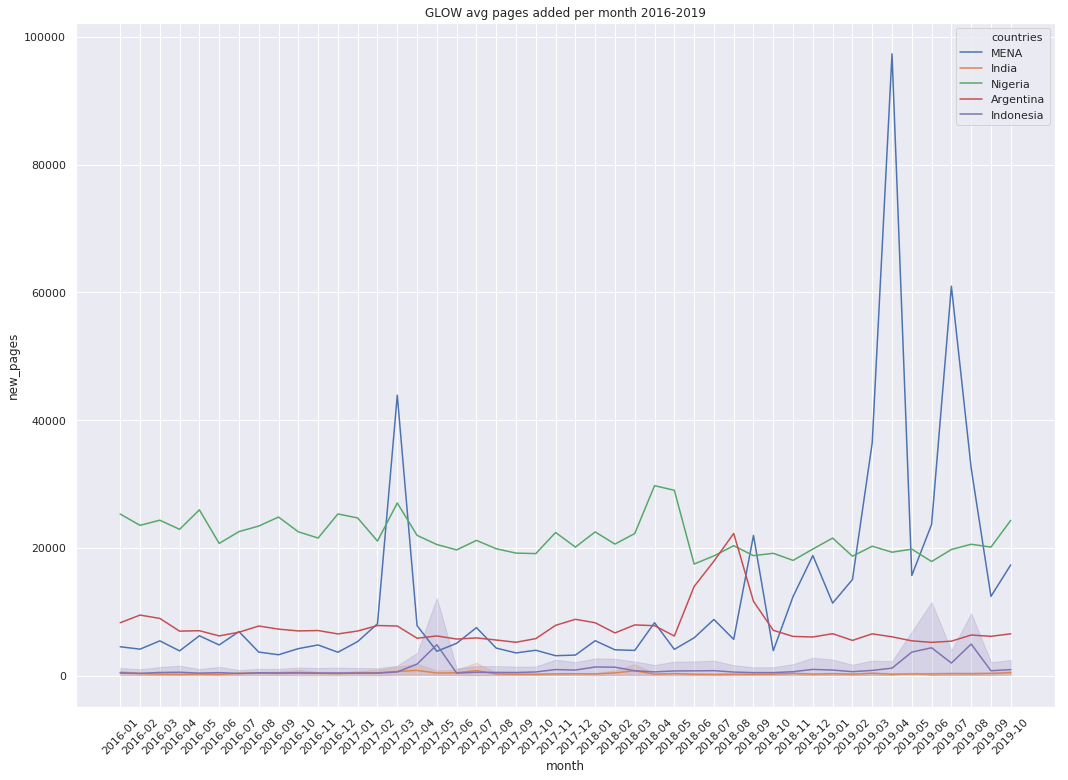

<Figure size 432x288 with 0 Axes>

In [442]:
sns.set() 
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)

ax.set_title('India/Indonesia avg pages added per month 2016-2019')
sns.lineplot(x="month", y="new_pages", hue="countries", 
            data=new_per_wp)

plt.xticks(rotation=45)
plt.title('GLOW avg pages added per month 2016-2019')

plt.tight_layout()
plt.show()
plt.savefig('figs/p_GLOW_avg_pages_added_per_month_2016_2019');

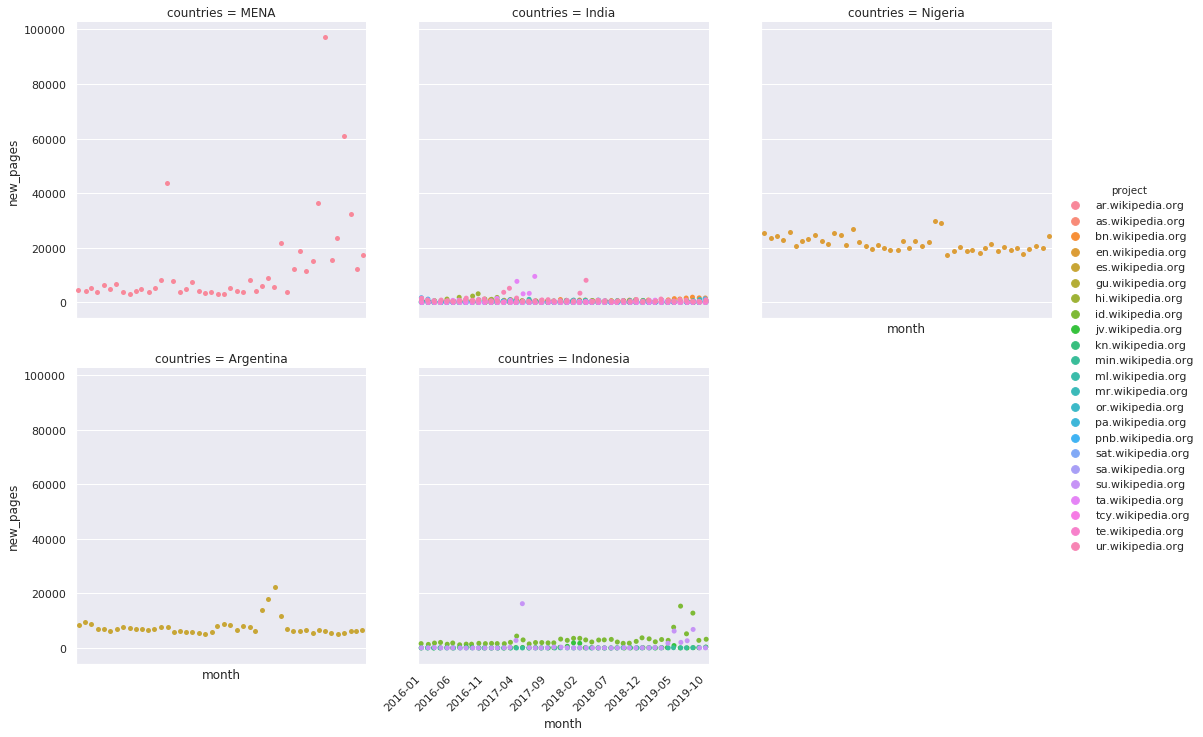

In [441]:
#CHART!
#https://seaborn.pydata.org/generated/seaborn.catplot.html


sns.set() 
ax = sns.catplot(
    #height=8.27, aspect=11.7/8.27, 
    x="month", 
    y="new_pages", 
    hue='project', 
    col='countries', 
    data=new_per_wp, 
    col_wrap=3)

fig.subplots_adjust(wspace=0, hspace=0)

for ax in ax.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
        label.set_visible(False)
        
plt.setp(ax.axes.get_xticklabels()[::5], visible=True)
plt.savefig('figs/p_comparative_avg_pages_added_per_month_2016_2019');

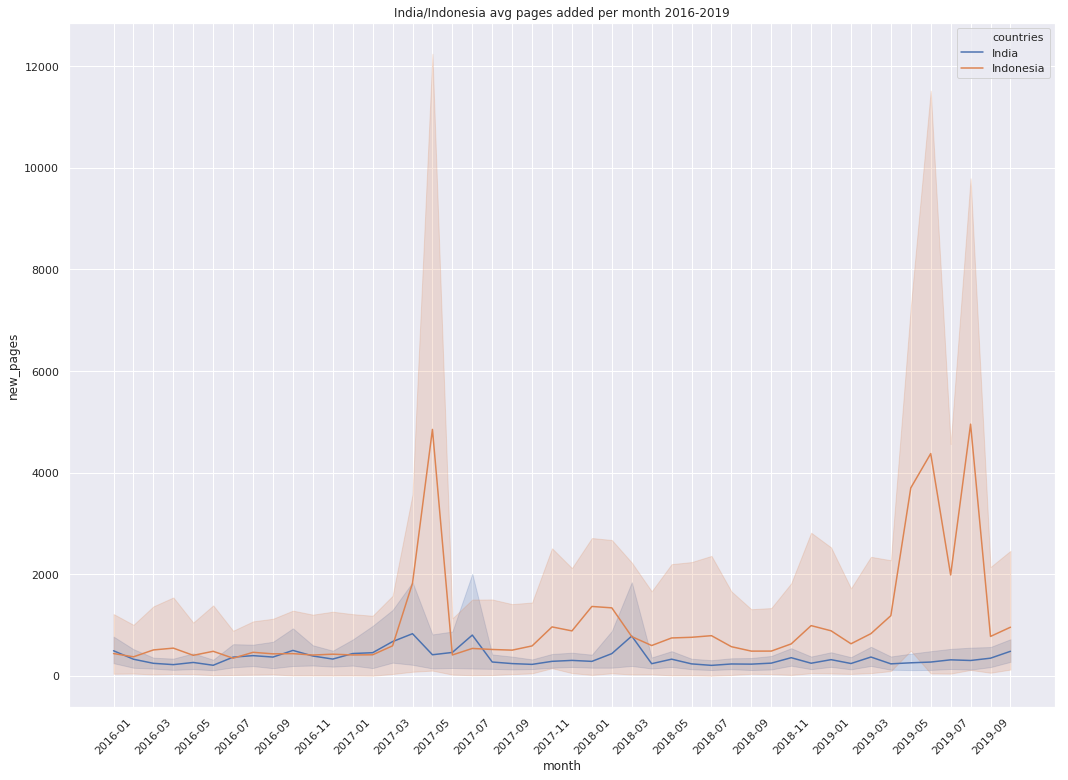

<Figure size 432x288 with 0 Axes>

In [440]:
sns.set() 
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)
#ax= sns.catplot(x="month", y="new_pages", hue="countries", kind="point", height=8.27, aspect=11.7/8.27, data=new_per_wp[new_per_wp.countries.isin(['India','Indonesia'])])

ax.set_title('India/Indonesia avg pages added per month 2016-2019')
sns.lineplot(x="month", y="new_pages", hue="countries", 
            data=new_per_wp[new_per_wp.countries.isin(['India','Indonesia'])])

plt.xticks(rotation=45)
plt.setp(ax.get_xticklabels()[1::2], visible=False, weight='light')
plt.title('India/Indonesia avg pages added per month 2016-2019')

plt.tight_layout()
plt.show()
plt.savefig('figs/p_India_Indonesia_avg_pages_added_per_month_2016_2019')

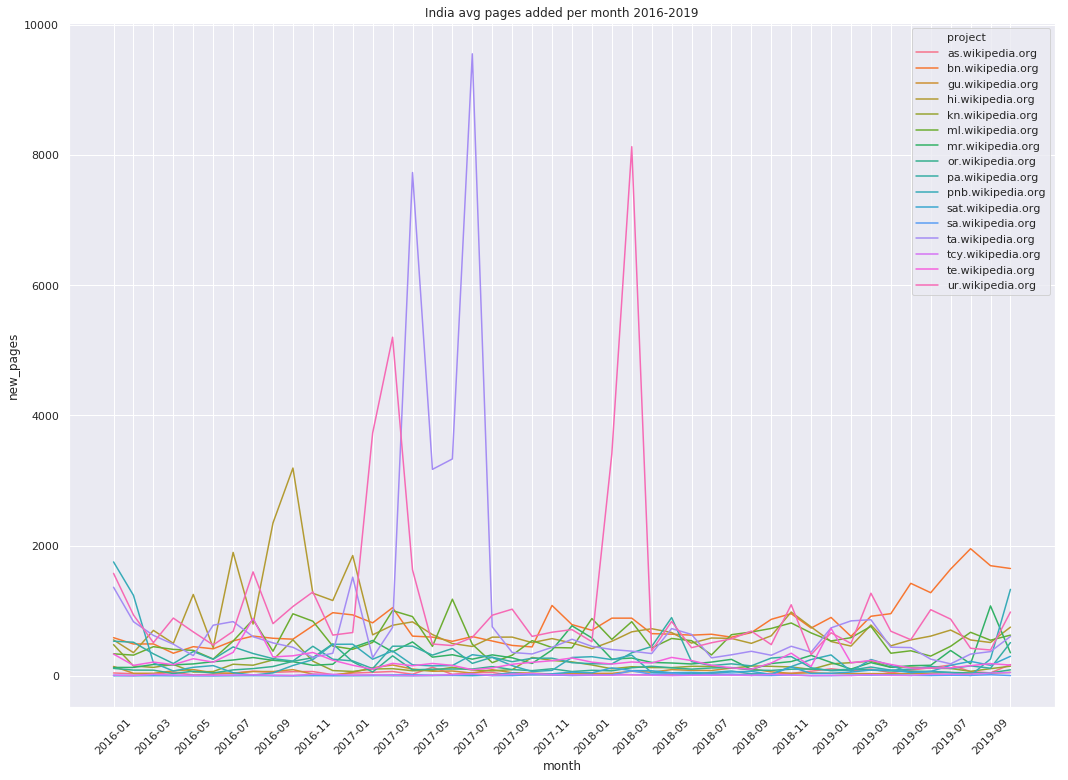

<Figure size 432x288 with 0 Axes>

In [439]:
sns.set() 
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)
#ax= sns.catplot(x="month", y="new_pages", hue="countries", kind="point", height=8.27, aspect=11.7/8.27, data=new_per_wp[new_per_wp.countries.isin(['India','Indonesia'])])

ax.set_title('India/Indonesia avg pages added per month 2016-2019')
sns.lineplot(x="month", y="new_pages", hue="project", 
            data=new_per_wp[new_per_wp.countries.isin(['India'])])

plt.xticks(rotation=45)
plt.setp(ax.get_xticklabels()[1::2], visible=False, weight='light')
plt.title('India avg pages added per month 2016-2019')

plt.tight_layout()
plt.show()
plt.savefig('figs/p_India_avg_pages_added_per_month_2016_2019')

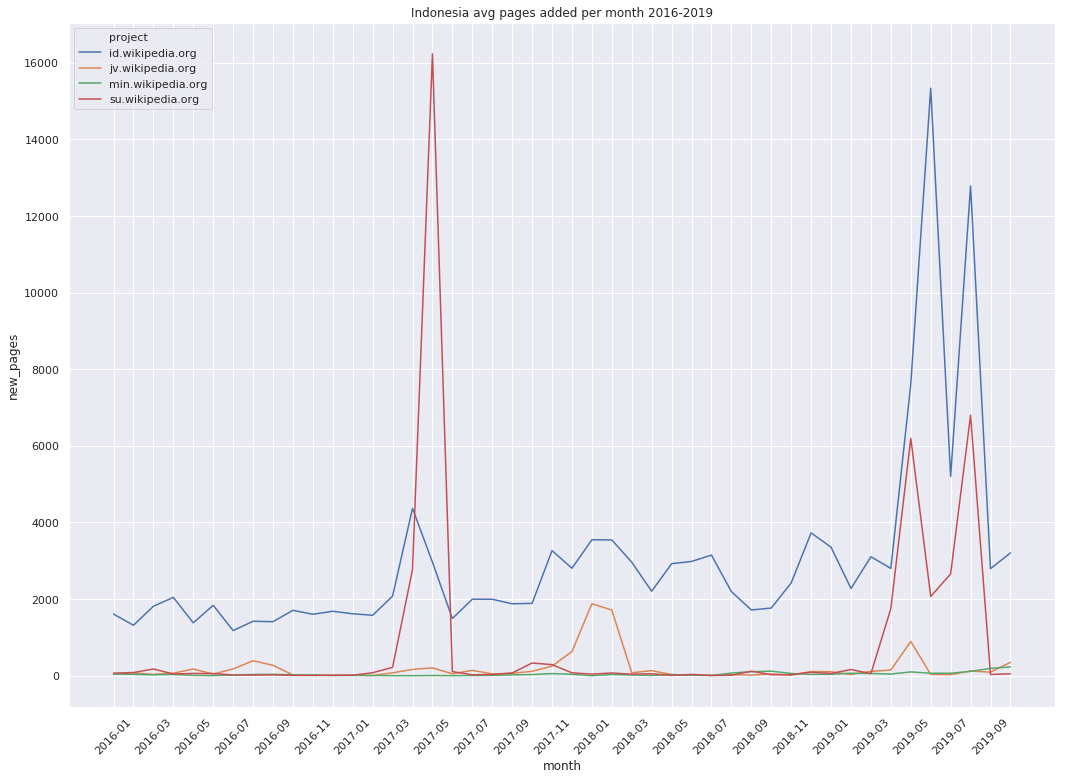

<Figure size 432x288 with 0 Axes>

In [438]:
sns.set() 
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)
#ax= sns.catplot(x="month", y="new_pages", hue="countries", kind="point", height=8.27, aspect=11.7/8.27, data=new_per_wp[new_per_wp.countries.isin(['India','Indonesia'])])

ax.set_title('India/Indonesia avg pages added per month 2016-2019')
sns.lineplot(x="month", y="new_pages", hue="project", 
            data=new_per_wp[new_per_wp.countries.isin(['Indonesia'])])

plt.xticks(rotation=45)
plt.setp(ax.get_xticklabels()[1::2], visible=False, weight='light')
plt.title('Indonesia avg pages added per month 2016-2019')

plt.tight_layout()
plt.show()
plt.savefig('figs/p_Indonesia_avg_pages_added_per_month_2016_2019')

In [375]:
npwp_pivot = pd.pivot_table(new_per_wp, index = 'project', values = 'new_pages', columns = 'year', aggfunc=[np.mean, len, min, max])

In [376]:
#change column names, see also:
#https://stackoverflow.com/questions/42060394/how-to-change-the-columns-name-from-a-tuple-to-string

my_colnames = []
for i, a in enumerate(npwp_pivot.columns.get_level_values(1)):
    my_colnames.append(str(a) + '_' + str(npwp_pivot.columns.get_level_values(0)[i]))
npwp_pivot.columns = my_colnames

In [377]:
#sort columns
npwp_pivot = npwp_pivot.reindex(sorted(npwp_pivot.columns), axis=1)

#shift project column to first place
cols = list(npwp_pivot.columns)
cols =[cols[-1]] + cols[:-1]
npwp_pivot = npwp_pivot[cols]

#reset index
npwp_pivot = npwp_pivot.reset_index()

In [424]:
#create df with 2019 data to merge in... USE CONTEST PERIOD AND/OR COMPARISON PERIOD 
current_articles_added_avg = npwp_pivot[['project', '2019_mean', '2019_min', '2019_max']]

#rename column names
current_articles_added_avg.rename(columns = 
                                 {
                                   'project' : 'wiki',
                                   '2019_mean':'avg_m_articles_added',
                                   '2019_min': 'min_articles_added',
                                   '2019_max': 'max_articles_added'  
                                 }
                                 );

In [425]:
#create new countries column
current_articles_added_avg['countries'] = current_articles_added_avg['project'].apply(add_country_column).str[0]
#rename the MENA entry in the countries column
current_articles_added_avg['countries'] = current_articles_added_avg['countries'].replace({'M':'MENA'})

#shift project column to first place
cols = list(current_articles_added_avg.columns)
cols =[cols[-1]] + cols[:-1]
current_articles_added_avg = current_articles_added_avg[cols]

#sort table
current_articles_added_avg.sort_values(['countries', '2019_mean'], ascending=[True, False]);

/home/iflorez/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/iflorez/venv/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [427]:
#sort and reset index
current_articles_added_avg = current_articles_added_avg.sort_values(by=['2019_mean'], ascending=False)
current_articles_added_avg.reset_index(drop=True, inplace=True)

In [ ]:
current_articles_added_avg

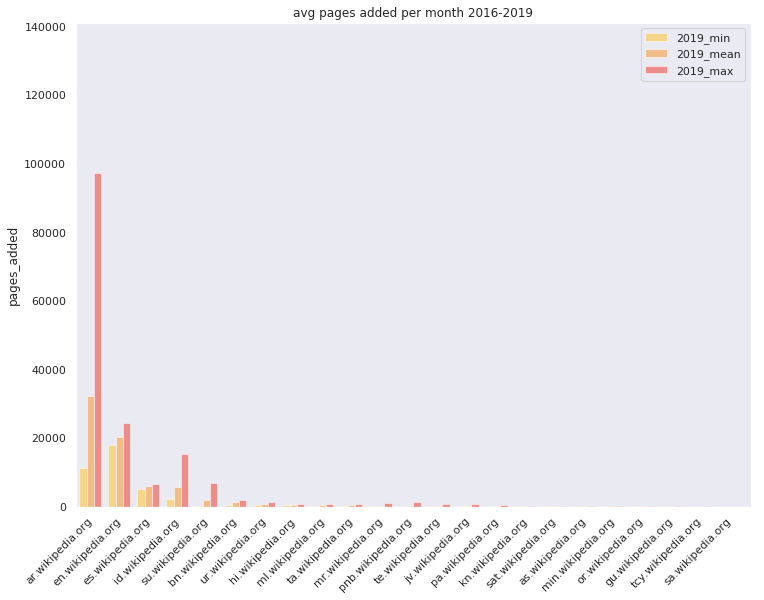

<Figure size 432x288 with 0 Axes>

In [437]:
# Setting the positions and width for the bars
pos = list(range(len(current_articles_added_avg['2019_min']))) 
width = 0.25
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12.1,8.9))

# Create a bar with min data,
# in position pos,
plt.bar(pos, 
        #using df,
        current_articles_added_avg['2019_min'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=current_articles_added_avg['project'][0]) 

# Create a bar with mean data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df,
        current_articles_added_avg['2019_mean'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=current_articles_added_avg['project'][1]) 

# Create a bar with max data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df,
        current_articles_added_avg['2019_max'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color= '#EE3224',    
        # with label the third value in first_name
        label=current_articles_added_avg['project'][2]) 




# Set the y axis label
ax.set_ylabel('pages_added')

# Set the chart's title
ax.set_title('avg pages added per month 2016-2019')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(current_articles_added_avg['project'])

plt.xticks(rotation=45, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(current_articles_added_avg['2019_min'] + current_articles_added_avg['2019_mean'] + current_articles_added_avg['2019_max'])] )

# Adding the legend and showing the plot
plt.legend(['2019_min', '2019_mean', '2019_max'], loc='upper right')
plt.grid()
plt.show()
plt.savefig('figs/p_avg_pages_added_per_month_2016_2019')

In [414]:
include_list = ['Argentina', 'India', 'Indonesia']
caaa_iia = current_articles_added_avg[current_articles_added_avg.countries.isin(include_list)].sort_values(by=['2019_mean'], ascending=False)
caaa_iia .reset_index(drop=True, inplace=True)

In [ ]:
caaa_iia

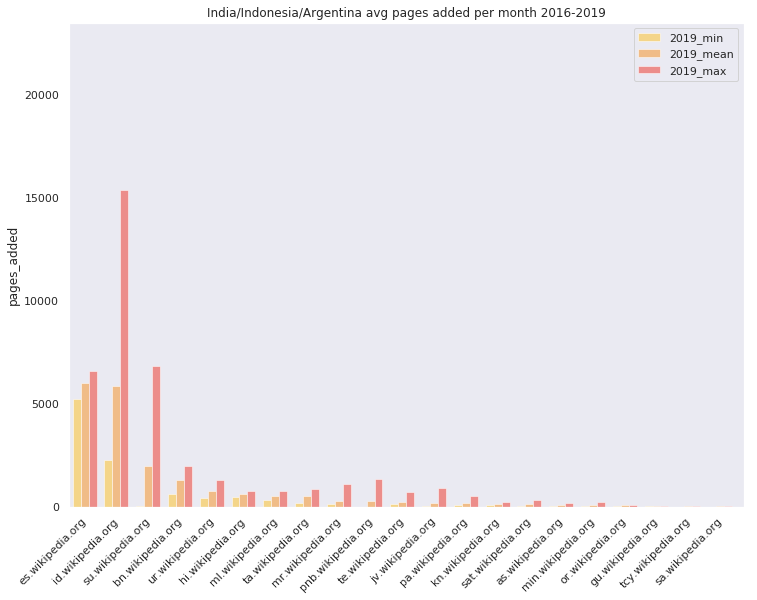

<Figure size 432x288 with 0 Axes>

In [436]:
# Setting the positions and width for the bars
pos = list(range(len(caaa_iia['2019_min']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12.1,8.9))

# Create a bar with min data,
# in position pos,
plt.bar(pos, 
        #using df
        caaa_iia['2019_min'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the first value in first_name
        label=caaa_iia['project'][0]) 

# Create a bar with mean data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df
        caaa_iia['2019_mean'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=caaa_iia['project'][1]) 

# Create a bar with max data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df
        caaa_iia['2019_max'], 
        #current_articles_added_avg[current_articles_added_avg.countries.isin(['India'])])
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color= '#EE3224',    
        # with label the third value in first_name
        label=caaa_iia['project'][2]) 

# Set the y axis label
ax.set_ylabel('pages_added')

# Set the chart's title
ax.set_title('India/Indonesia/Argentina avg pages added per month 2016-2019')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(caaa_iia['project'])

plt.xticks(rotation=45, ha='right')

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(caaa_iia['2019_min'] + caaa_iia['2019_mean'] + caaa_iia['2019_max'])] )

# Adding the legend and showing the plot
plt.legend(['2019_min', '2019_mean', '2019_max'], loc='upper right')
plt.grid()
plt.show()
plt.savefig('figs/p_India_Indonesia_Argentina_avg_pages_added_per_month_2016_2019')



In [ ]:
merge_in(current_articles_added_avg)